# TP 6 - Réseaux de neurones.

Dans ce TP, nous allons construire un classifieur à base de réseaux de  neurones pour la base de données MNIST.
Certaines étapes sont similaires au TP 4 (KNN), vous pouvez reprendre certains bouts de code de votre TP.

Nous allons également étudier l'influence du nombre d'époques et du nombre de couches sur la classification. Egalement, nous évaluerons notre algorithme de classification à l'aide d'une matrice de confusion.

In [ ]:
import numpy as np
import tensorflow
from tensorflow import keras
from sklearn import datasets
from keras import layers, Sequential


## Traitement des données

Exécutez la cellule suivante pour récupérer la base de données MNIST.

In [ ]:
mnist = datasets.load_digits()
np.shape(mnist.data)

(1797, 64)

Combien y a-t-il de classes différentes dans MNIST ? Combien aura-t-on de neurones de sortie dans le réseau ?

Réponse : **Il y a 10 classes dans mnist. On aura 10 neurones a la sortie de notre reseau**

En fonction de votre réponse à la question précédente, donner une fonction one_hot_encoding, qui à partir d'un nombre de classe et de l'ensemble des labels de la base de données MNIST, renvoie ces labels sous la forme de one hot vectors.

In [ ]:
def one_hot_encoding(label,nombre_classe) :
  mat = np.zeros((len(label),nombre_classe))
  for i in range(len(label)) :
    l = label[i]
    mat[i,l] = 1
  return mat


In [ ]:
one_hot_encoding(mnist.target,10)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

Utiliser la fonction train_test_split de sklearn pour diviser votre base de données en ensemble d'entrainement et de test (choisir 20% de test_size).



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(mnist["data"],mnist["target"],test_size=0.2)

## Premier réseau

Notre premier réseau sera très simple. Il sera constitué d'une unique couche de nb_class neurones.

Quelle doit-être la fonction d'activation des neurones de cette couche ? Quelle doit-être la fonction de coût ?

Réponse : **la fonction d'activation doit etre softmax et la fonction de cout doit etre la categorical cross entropy**

Construire ce réseau avec Keras. Utiliser la fonction .summary() pour vérifier l'architecture de voter réseau.

In [ ]:
model= Sequential()
model.add(layers.Input(shape=(64,)))
model.add(layers.Dense(10,activation='softmax'))

Compiler maintenant votre modèle, en utilisant un optimizer "sgd" et et la fonction de coût de votre réponse précédente.

In [ ]:
model.compile (optimizer='sgd',loss=keras.losses.CategoricalCrossentropy(),metrics=[keras.metrics.CategoricalAccuracy()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


Entrainer votre modèle avec votre ensemble d'entrainement et vos labels sous forme de hot-hot vectors. Choisir une taille de batch de 64 et un nombre d'époque de 10.

In [ ]:
model.fit(x_train,one_hot_encoding(y_train,10),batch_size=64,epochs=10)

Epoch 1/10
23/23 [==============================] - 0s 2ms/step - loss: 4.7132 - categorical_accuracy: 0.3960
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 1.2358 - categorical_accuracy: 0.7049
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 0.7414 - categorical_accuracy: 0.8114
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.5468 - categorical_accuracy: 0.8553
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4409 - categorical_accuracy: 0.8817
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3908 - categorical_accuracy: 0.8880
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3337 - categorical_accuracy: 0.9074
Epoch 8/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3065 - categorical_accuracy: 0.9165
Epoch 9/10
23/23 [==============================] - 0s 2ms/step - loss: 0.2746 - categorical_accuracy: 0.9130
Epoch 10/1

Utiliser la fonction .predict pour récupérer les prédiction de votre modèle sur l'ensemble de test.

In [ ]:
ychap=model.predict(x_test)
print(ychap)

12/12 [==============================] - 0s 2ms/step
[[9.6986783e-09 3.7003194e-03 1.3609717e-02 ... 3.8695300e-05
  1.3058339e-03 6.0411843e-05]
 [1.3083413e-09 1.7339229e-06 3.0361883e-07 ... 9.9613196e-01
  4.5394572e-05 3.3207164e-07]
 [8.7763794e-04 2.1598798e-03 1.9932406e-05 ... 7.8387411e-06
  6.1117655e-01 1.5846232e-02]
 ...
 [1.6039130e-10 2.3049597e-11 7.0961135e-13 ... 5.5442012e-11
  3.1293570e-07 7.4160163e-04]
 [2.1020269e-05 2.4140930e-04 7.0900086e-08 ... 9.6433185e-04
  6.5326508e-06 9.9632365e-01]
 [3.9091192e-05 6.5572117e-06 4.0274792e-04 ... 2.8300451e-03
  2.9373538e-01 5.6031207e-04]]


In [ ]:
ychap_arrondi=np.around(ychap)
print(ychap_arrondi)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


Afficher un exemple (en utilisant imshow) et sa prédiction.

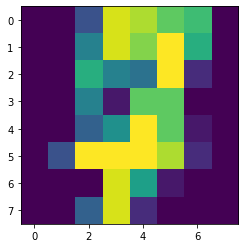

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1].reshape([8,8]))


In [ ]:
ychap_arrondi[1]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Implémenter une fonction accuracy qui, a partit des prédictions d'un réseau et d'un ensemble de labels, renvoie l'accuracy du modèle.

In [ ]:
def to_class(m):
  (labels,nb_classes)=np.shape(m)
  t=np.zeros(labels)
  for i in range(len(m)):
    for j in range(nb_classes):
      if m[i,j]==1:
        t[i]=j
  return t

In [ ]:
def accuracy2(pred,lab):
  truepred=0
  for i in range(len(lab)):
    if lab[i]==pred[i]:
        truepred+=1
  return print('accuracy=',truepred*1.0/len(lab))

In [ ]:
accuracy2(to_class(ychap_arrondi),y_test)

accuracy= 0.8916666666666667


Comparer vos résultats avec les résultats fournis par keras avec la fonction .evaluate (voir https://keras.io/api/models/model_training_apis/#evaluate-method)

In [ ]:
model.evaluate(x_test,one_hot_encoding(y_test,10))

12/12 [==============================] - 0s 2ms/step - loss: 0.3247 - categorical_accuracy: 0.8917


[0.3247262239456177, 0.8916666507720947]

Donner une fonction confusion_matrix, qui produit, à partir des predictions d'un modèle et des labels, la matrice de confusion du modèle.

En fonction de votre implémentation, il peut être utile de définir une fonction to_class, qui à partir d'un vecteur de prédiction (ou d'un one-hot vector), renvoie la classe correspondante (le numéro dessiné).

In [ ]:
to_class(one_hot_encoding(mnist.target,10))#test de to_class

array([0., 1., 2., ..., 8., 9., 8.])

In [ ]:
def confusion_matrix(pred,lab):
  mat=np.zeros((10,10))
  for i in range(10):
    for j in range(10):
      for k in range(len(lab)):
        if pred[k]==i and lab[k]==j:
          mat[i,j]+=1
  return mat

Afficher la matrice de confusion

In [ ]:
confusion_matrix(to_class(ychap_arrondi),y_test)

array([[31.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  3.],
       [ 0., 25.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  4.],
       [ 0.,  0., 33.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 26.,  0.,  0.,  0.,  1.,  0.,  4.],
       [ 0.,  0.,  0.,  0., 39.,  1.,  0.,  4.,  0.,  1.],
       [ 1.,  0.,  0.,  1.,  0., 34.,  0.,  0.,  2.,  0.],
       [ 1.,  0.,  1.,  0.,  2.,  0., 28.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 33.,  0.,  0.],
       [ 0.,  0.,  2.,  1.,  0.,  0.,  0.,  0., 32.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1., 40.]])

## Nombre d'époques et complexité du modèle

Combien faut-il d'époque pour que votre premier modèle atteigne 95% d'accuracy ?

In [ ]:
model1= Sequential()
model1.add(layers.Input(shape=(64,)))
model1.add(layers.Dense(10,activation='softmax'))
model1.compile (optimizer='sgd',loss=keras.losses.CategoricalCrossentropy(),metrics=[keras.metrics.CategoricalAccuracy()])
model1.summary()
model1.fit(x_train,one_hot_encoding(y_train,10),batch_size=64,epochs=25)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
23/23 [==============================] - 1s 3ms/step - loss: 3.8886 - categorical_accuracy: 0.4106
Epoch 2/25
23/23 [==============================] - 0s 4ms/step - loss: 1.3256 - categorical_accuracy: 0.6980
Epoch 3/25
23/23 [==============================] - 0s 4ms/step - loss: 0.8101 - categorical_accuracy: 0.7947
Epoch 4/25
23/23 [==============================] - 0s 3ms/step - loss: 0.5570 - categorical_accuracy: 0.8455
Epoch 5/25
23/23 [==============================] - 0s 3ms/step - loss: 0.4202 - categorical_accuracy: 0.8782
Epoch 6/25
23/23 [================

In [ ]:
model1.evaluate(x_test,one_hot_encoding(y_test,10))

12/12 [==============================] - 0s 3ms/step - loss: 0.1299 - categorical_accuracy: 0.9583


[0.12992224097251892, 0.9583333134651184]

Réponse : **il faut 25 epoques pour atteindre 95% d'accuracy**

Définir un deuxieme réseau a deux couches. La couche cachée contient 32 neurones. La couche de sortie en contient 10. Entrainer ce modèle.
Combien faut-il d'époques pour atteindre 95% d'accuracy ?

In [ ]:
model2= Sequential()
model2.add(layers.Input(shape=(64,)))
model2.add(layers.Dense(32))
model2.add(layers.Dense(10,activation='softmax'))
model2.compile (optimizer='sgd',loss=keras.losses.CategoricalCrossentropy(),metrics=[keras.metrics.CategoricalAccuracy()])
model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 2,410
Trainable params: 2,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(x_train,one_hot_encoding(y_train,10),batch_size=64,epochs=20)

Epoch 1/20
23/23 [==============================] - 1s 3ms/step - loss: 4.8086 - categorical_accuracy: 0.4857
Epoch 2/20
23/23 [==============================] - 0s 5ms/step - loss: 0.7969 - categorical_accuracy: 0.8121
Epoch 3/20
23/23 [==============================] - 0s 5ms/step - loss: 0.4605 - categorical_accuracy: 0.8740
Epoch 4/20
23/23 [==============================] - 0s 5ms/step - loss: 0.3305 - categorical_accuracy: 0.9005
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 0.2821 - categorical_accuracy: 0.9102
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.1945 - categorical_accuracy: 0.9443
Epoch 7/20
23/23 [==============================] - 0s 4ms/step - loss: 0.1818 - categorical_accuracy: 0.9443
Epoch 8/20
23/23 [==============================] - 0s 3ms/step - loss: 0.1497 - categorical_accuracy: 0.9499
Epoch 9/20
23/23 [==============================] - 0s 7ms/step - loss: 0.1460 - categorical_accuracy: 0.9527
Epoch 10/2

In [ ]:
model2.evaluate(x_test,one_hot_encoding(y_test,10)) #sur l'ensemble test


12/12 [==============================] - 0s 3ms/step - loss: 0.1906 - categorical_accuracy: 0.9500


[0.19055184721946716, 0.949999988079071]

**on obtiens 95% d'accuracy sur l'ensemble de test a partir de 25 epoques pour le 1er model alors que 20 suffisent pour le 2eme(sachant que les resultats peuvent varier en fonction de la repartion des train/test sets)**

In [ ]:
for i in range(3):


0
1
2
